In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [12]:
# Load the Dataset
dataset = pd.read_csv('C:/Users/intel/Downloads/Loan Prediction info.csv', low_memory=False)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years_in_Job                  106430 non-null  float64
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11   Years of Credit History      111107 non-null  float64
 12  Months since last delinquent  111107 non-nul

In [14]:
dataset.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years_in_Job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,1.0,Rent,46643.0,Debt Consolidation,777.39,18.0,10,12,0,6762,7946,1,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10.0,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,0,14,0,35706,77961,1,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9.0,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32,11,1,11275,14815,2,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3.0,Rent,34171.0,Debt Consolidation,990.94,10.0,0,21,0,7009,43533,1,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10.0,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25,13,1,16913,19553,2,0.0


In [15]:
dataset.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years_in_Job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,10.0,Rent,43050.0,Debt Consolidation,889.69,14.1,49,18,0,14730,29757,1,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,10.0,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48,11,0,17733,23060,1,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,5.0,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,0,11,0,5205,6348,1,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,10.0,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9,12,0,32318,37580,1,0.0
111106,f83ae0e1-bd30-46c7-9f72-f4f9fe2f36ca,74187e35-39c2-4010-ae0d-8bcd0544189e,Fully Paid,9209,Long Term,708.0,1.0,Own Home,123454.0,Debt Consolidation,668.71,20.1,16,8,0,6835,9261,1,0.0


#### Summary Statistics

In [16]:
summary_stats = dataset.describe()
print(summary_stats)

       Current Loan Amount  Credit Score   Years_in_Job  Annual Income  \
count         1.111070e+05  89769.000000  106430.000000   8.976900e+04   
mean          1.146368e+07   1075.795029       5.973410   7.248600e+04   
std           3.183875e+07   1474.133505       3.500939   5.593094e+04   
min           0.000000e+00    585.000000       0.000000   4.033000e+03   
25%           8.160000e+03    705.000000       3.000000   4.468800e+04   
50%           1.417900e+04    724.000000       6.000000   6.175200e+04   
75%           2.381300e+04    741.000000      10.000000   8.688700e+04   
max           1.000000e+08   7510.000000      10.000000   8.713547e+06   

        Years of Credit History  Months since last delinquent  \
count             111107.000000                 111107.000000   
mean                  18.201003                     16.367538   
std                    7.014495                     23.016028   
min                    3.600000                      0.000000   
25%     

In [19]:
dataset.shape

(111107, 19)

In [20]:
dataset.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years_in_Job', 'Home Ownership', 'Annual Income',
       'Purpose', 'Monthly Debt', ' Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

##### Observations from Summary Statistics:

1) Loan ID & Customer ID: Unique identifiers; no statistical insights.
2) Loan Status: Shows counts of approved vs. rejected loans; indicates lending trends.
3) Current Loan Amount:
4) Mean: Average borrowing level.
5) Range: Indicates variability; check for outliers.
6) Term: Frequency distribution shows borrower preferences for loan duration.
7) Credit Score:
Mean: Average creditworthiness.
Outliers: Low scores indicate risk.

#### Univariate Analysis

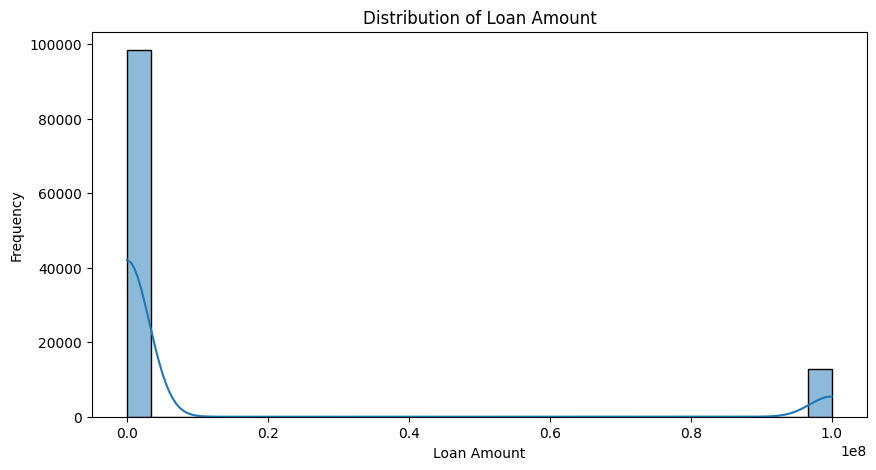

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numerical variable (e.g., Loan Amount)
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Current Loan Amount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


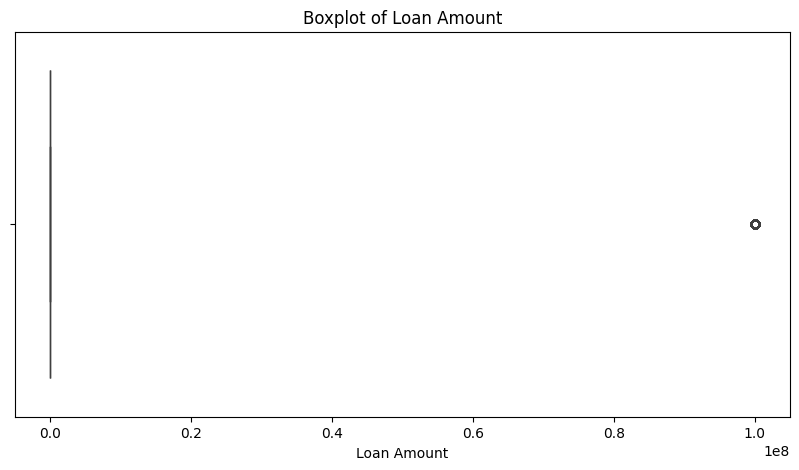

In [24]:
# Boxplot for Loan Amount
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['Current Loan Amount'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

##### Observations from Numerical Analysis:
1) The histogram shows the distribution shape and any potential skewness.
2) The boxplot helps identify outliers and the spread of data.

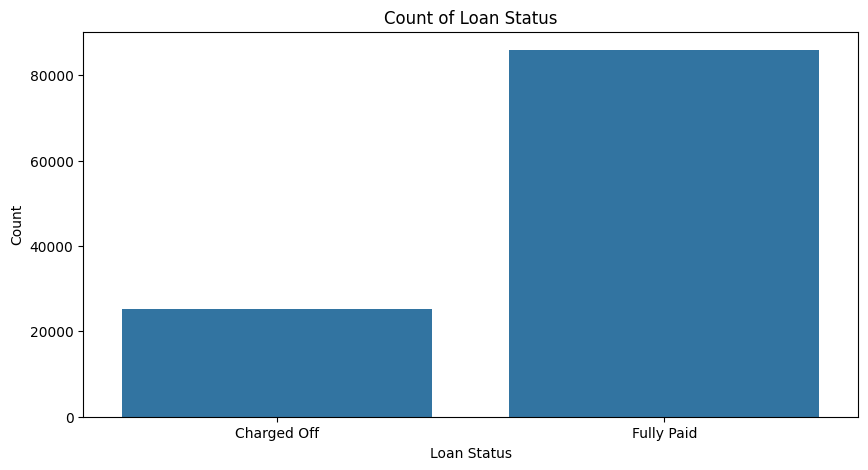

In [26]:
# Count plot for a categorical variable (e.g., Loan Status)
plt.figure(figsize=(10, 5))
sns.countplot(x='Loan Status', data=dataset)
plt.title('Count of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

Index(['Gender'], dtype='object')
   Gender
0    Male
1  Female
2  Female
3    Male
4  Female


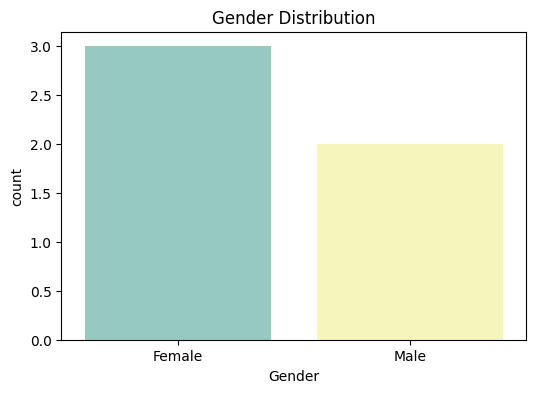

In [35]:
# Check columns and data
print(dataset.columns)
print(dataset.head())

# Ensure Gender is categorical
dataset['Gender'] = dataset['Gender'].astype('category')

# Plotting
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=dataset, palette='Set3')
plt.title('Gender Distribution')
plt.show()